In [24]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Enjoy sports (1).csv'
df = pd.read_csv(file_path)


In [15]:
# Function to calculate entropy
def calculate_entropy(data, target_column):
    values, counts = np.unique(data[target_column], return_counts=True)
    entropy = -sum((counts[i] / sum(counts)) * np.log2(counts[i] / sum(counts)) for i in range(len(values)))
    return entropy

In [16]:
# Function to calculate information gain
def information_gain(data, split_attribute, target_attribute):
    # Calculate the total entropy of the target attribute
    total_entropy = calculate_entropy(data, target_attribute)

    # Values and counts of the split attribute
    values, counts = np.unique(data[split_attribute], return_counts=True)

    # Weighted entropy after the split
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) *
                               calculate_entropy(data[data[split_attribute] == values[i]], target_attribute)
                               for i in range(len(values))])

    # Information gain calculation
    info_gain = total_entropy - weighted_entropy
    return info_gain

In [17]:
# Calculate and print entropy for specific values in the 'Outlook' feature (Sunny, Overcast)
for value in ['Sunny', 'Overcast']:
    subset_sunny_overcast = df[df['Outlook'] == value]
    entropy_value = calculate_entropy(subset_sunny_overcast, 'Decision')
    print(f"Entropy for Outlook = {value}: {entropy_value:.6f}")  # Full decimal precision

Entropy for Outlook = Sunny: 0.970951
Entropy for Outlook = Overcast: -0.000000


In [18]:
# Calculate and print entropy for the 'Humidity' feature
for value in df['Humidity'].unique():
    subset_humidity = df[df['Humidity'] == value]
    entropy_value = calculate_entropy(subset_humidity, 'Decision')
    print(f"Entropy for Humidity = {value}: {entropy_value:.6f}")  # Full decimal precision


Entropy for Humidity = High: 0.985228
Entropy for Humidity = Normal: 0.591673


In [19]:
# Calculate and print information gain for each feature
features = df.columns[:-1]  # Exclude the target column 'Decision'
for feature in features:
    gain = information_gain(df, feature, 'Decision')
    print(f"Information Gain for {feature}: {gain:.6f}")  # Full decimal precision

Information Gain for Day: 0.940286
Information Gain for Outlook: 0.246750
Information Gain for Temp.: 0.029223
Information Gain for Humidity: 0.151836
Information Gain for Wind: 0.048127


In [20]:
# Convert categorical features to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns[:-1]:  # Exclude the target column
    df[column] = label_encoder.fit_transform(df[column])

In [21]:
# Define features and target
X = df.drop(columns=['Decision'])
y = df['Decision']

In [22]:
# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')  # Use 'entropy' to match manual entropy calculation
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

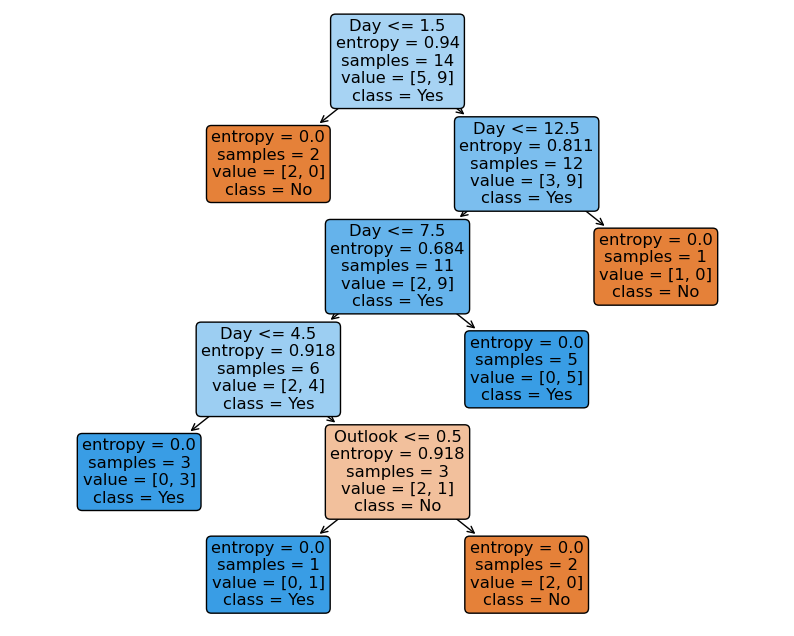

In [23]:
# Plot and visualize the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()